## Exploration of Data 

In [1]:
import librosa
audio_file = r'H:\Deep Learning\Music Generator by Genre\GTZAN Data\genres_original\blues\blues.00000.wav'
signal, sr = librosa.load(audio_file, sr=46050)

In [2]:
print(signal)

[ 0.00717349  0.01327853  0.0164216  ... -0.07313836 -0.0610414
 -0.03000665]


### Inspecting audio properties

In [4]:
duration = librosa.get_duration(y=signal, sr=sr)
print(f"Duration: {duration:.2f} seconds")
if len(signal.shape) == 1:
    print("The audio is MONO.")
else:
    print("The audio is STEREO.")

Duration: 30.01 seconds
The audio is MONO.


### Visualizing the Audio Data

In [8]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

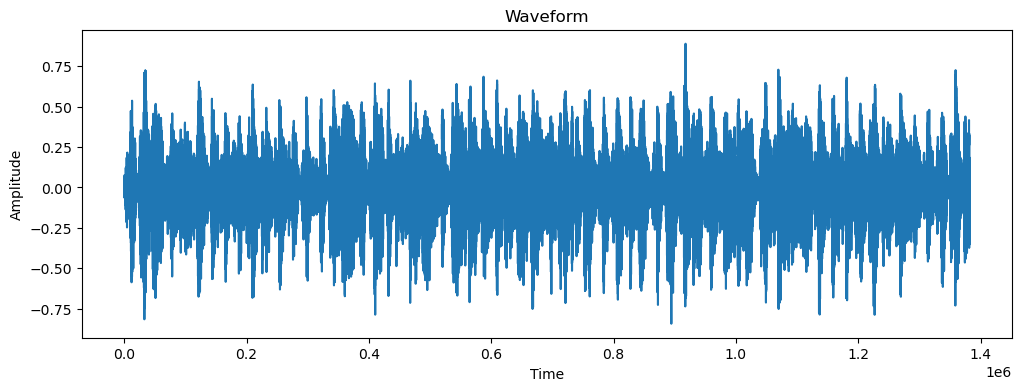

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_36332\4007672798.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)


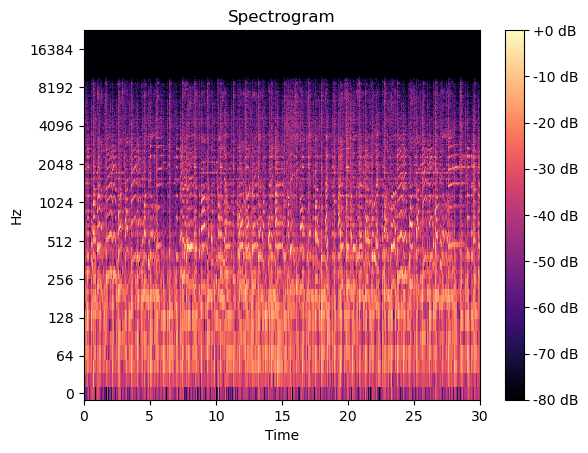

In [9]:

spectrogram = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

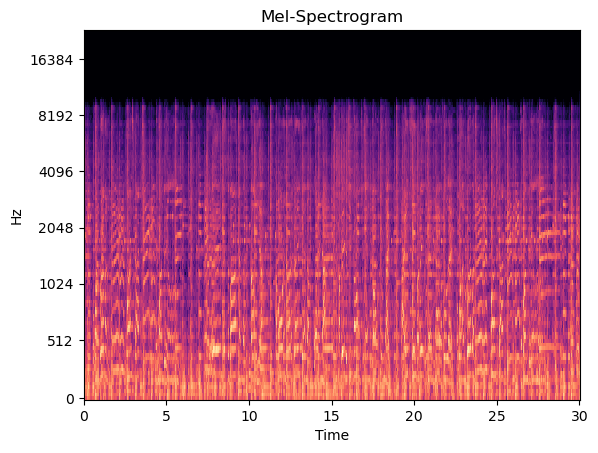

In [10]:
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr)
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-Spectrogram')
plt.show()

### Pitch of the Audio

In [11]:
import librosa

def get_pitch_yin(audio_file):
    # Load audio file
    signal, sr = librosa.load(audio_file, sr=None)

    # Estimate pitch using YIN algorithm
    f0 = librosa.yin(signal, fmin=50, fmax=500)  # Adjust fmin, fmax based on audio

    # Remove NaN values and calculate average pitch
    f0 = f0[f0 > 0]  # Remove unvoiced frames (zeros)
    avg_pitch = f0.mean() if len(f0) > 0 else 0
    print(f"Estimated Pitch (YIN): {avg_pitch:.2f} Hz")


In [12]:
get_pitch_yin(audio_file=audio_file)

Estimated Pitch (YIN): 126.70 Hz


### Extract features

#### Time domain features

In [13]:
zcr = librosa.feature.zero_crossing_rate(signal)
rms = librosa.feature.rms(y=signal)

print('Zero Crossing Rate: ',zcr)
print('Root Mean Square: ',rms)


Zero Crossing Rate:  [[0.03271484 0.05273438 0.06591797 ... 0.02978516 0.01855469 0.01269531]]
Root Mean Square:  [[0.01943709 0.02289756 0.02643247 ... 0.14995687 0.15165132 0.13253036]]


#### Frequency domain features

In [19]:
centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sr)
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

print('Centroid: ',centroid)
print('Bandwidth: ',bandwidth)
print('MFCCs: ',mfccs)


Centroid:  [[2242.72535157 2146.5738552  2071.54870013 ... 1471.98794827
  1389.34021219 1528.54261472]]
Bandwidth:  [[2623.82688111 2393.35152708 2220.99546924 ... 1738.61630415
  1754.65464056 2011.47494591]]
MFCCs:  [[-293.41257    -264.39734    -268.82538    ... -155.88246
  -154.4703     -171.08058   ]
 [ 139.05478     151.51514     148.28433    ...  210.53513
   214.0094      202.5639    ]
 [ -25.398205    -30.140665    -32.290207   ...  -58.115334
   -53.659027    -50.93889   ]
 ...
 [  -5.528349     -4.845888     -4.312445   ...   -4.682721
     1.9949874     9.190647  ]
 [  11.694023     13.382048     13.951845   ...    4.063254
     3.7218132     3.002235  ]
 [   0.61355066   -1.640236     -2.5999203  ...   -4.952117
   -11.200025     -9.339584  ]]


In [20]:
print("Mean of MFCCs:", np.mean(mfccs, axis=1))
print("Variance of Spectral Centroid:", np.var(centroid))

Mean of MFCCs: [-189.01685     188.9984      -45.695843     41.422424     10.7066145
    0.21221626   17.864471    -13.924323      9.814657      0.75941634
   -6.919304      8.902926     -6.120566  ]
Variance of Spectral Centroid: 142589.95686134015


### Choosing Fixed Lengths

In [7]:
import os
import librosa
import numpy as np

# Path to dataset
DATA_PATH = r'H:\Deep Learning\Music Generator by Genre\GTZAN Data\genres_original'

# Analyze audio file durations
durations = []

for genre in os.listdir(DATA_PATH):
    genre_path = os.path.join(DATA_PATH, genre)
    for file in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file)
        
        # Use librosa for loading audio
        try:
            audio, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)
            durations.append(duration)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Statistical analysis
print(f"Total audio files: {len(durations)}")
print(f"Max duration: {np.max(durations)} seconds")
print(f"Min duration: {np.min(durations)} seconds")
print(f"Mean duration: {np.mean(durations):.2f} seconds")
print(f"Median duration: {np.median(durations):.2f} seconds")


C:\Users\HP\AppData\Local\Temp\ipykernel_6268\2143855399.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
c:\Users\HP\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading H:\Deep Learning\Synthetic Audio Generator from Audio Data\GTZAN Data\genres_original\jazz\jazz.00054.wav: 
Total audio files: 999
Max duration: 30.648888888888887 seconds
Min duration: 29.931972789115648 seconds
Mean duration: 30.02 seconds
Median duration: 30.01 seconds


In [8]:
# Common settings for spectrogram computation
sr = 46050  # Sampling rate
hop_length = 512  # Hop length used in spectrogram calculation

# Convert duration statistics to spectrogram frames
max_frames = int(np.max(durations) * sr / hop_length)
min_frames = int(np.min(durations) * sr / hop_length)
mean_frames = int(np.mean(durations) * sr / hop_length)
median_frames = int(np.median(durations) * sr / hop_length)

print(f"Max frames: {max_frames}")
print(f"Min frames: {min_frames}")
print(f"Mean frames: {mean_frames}")
print(f"Median frames: {median_frames}")


Max frames: 2756
Min frames: 2692
Mean frames: 2700
Median frames: 2699


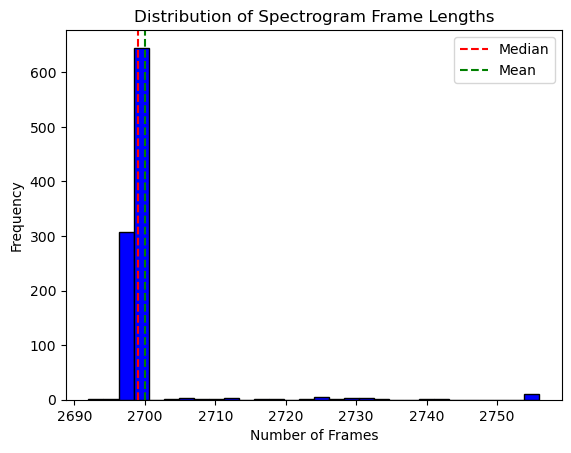

In [9]:
import matplotlib.pyplot as plt

frame_lengths = [int(d * sr / hop_length) for d in durations]
plt.hist(frame_lengths, bins=30, color='blue', edgecolor='black')
plt.axvline(x=np.median(frame_lengths), color='red', linestyle='--', label='Median')
plt.axvline(x=np.mean(frame_lengths), color='green', linestyle='--', label='Mean')
plt.xlabel("Number of Frames")
plt.ylabel("Frequency")
plt.title("Distribution of Spectrogram Frame Lengths")
plt.legend()
plt.show()


In [10]:
def process_audio(file_path, fixed_length=1300):
    audio, sr = librosa.load(file_path, sr=46050)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, hop_length=512)

    # Ensure fixed length
    if spectrogram.shape[1] < fixed_length:
        # Pad if too short
        pad_width = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
    else:
        # Truncate if too long
        spectrogram = spectrogram[:, :fixed_length]

    return spectrogram
